# UTSA CS 3793: Assignment-1

**Last Name - First Name - (abc123)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [16]:
# Add only your imports here

#installing the required packages
%pip install networkx 
%pip install matplotlib
%pip install pandas
%pip install numpy

import collections
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import matplotlib.image as mpimg
import numpy as np

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\chori\appdata\local\programs\python\python311\lib\site-packages (3.8.3)




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"
cities_file ="cities.csv"
distances_file =  "distances.csv"
texas_map =  "texas-map-2.png"


In [18]:
# Load the graph data from the files
# Create the dataframe for cities and distances csv files for data manipulation
cities_df = pd.read_csv(cities_file, header=None, names=["city", "latitud", "longitud"])
distances_df = pd.read_csv(distances_file, header=None, names=["city1", "city2", "distance"])

%matplotlib inline


# Load the Texas map image
img = mpimg.imread(texas_map)

# The range size of texas by coordinates
lat_min, lat_max = 25.8371, 36.5007
lon_min, lon_max = -106.6492, -93.5072

# Function to convert lat/lon to pixel coordinates
def latlon_to_pixels(lat, lon, img_shape, lat_min, lat_max, lon_min, lon_max):
    img_h, img_w, _ = img_shape
    x = (lon - lon_min) / (lon_max - lon_min) * img_w
    y = img_h - (lat - lat_min) / (lat_max - lat_min) * img_h  # Flip y-axis
    return x, y

# Convert city coordinates to pixel positions
node_positions = {row["city"]: latlon_to_pixels(row["latitud"], row["longitud"], img.shape, lat_min, lat_max, lon_min, lon_max) 
                  for _, row in cities_df.iterrows()}

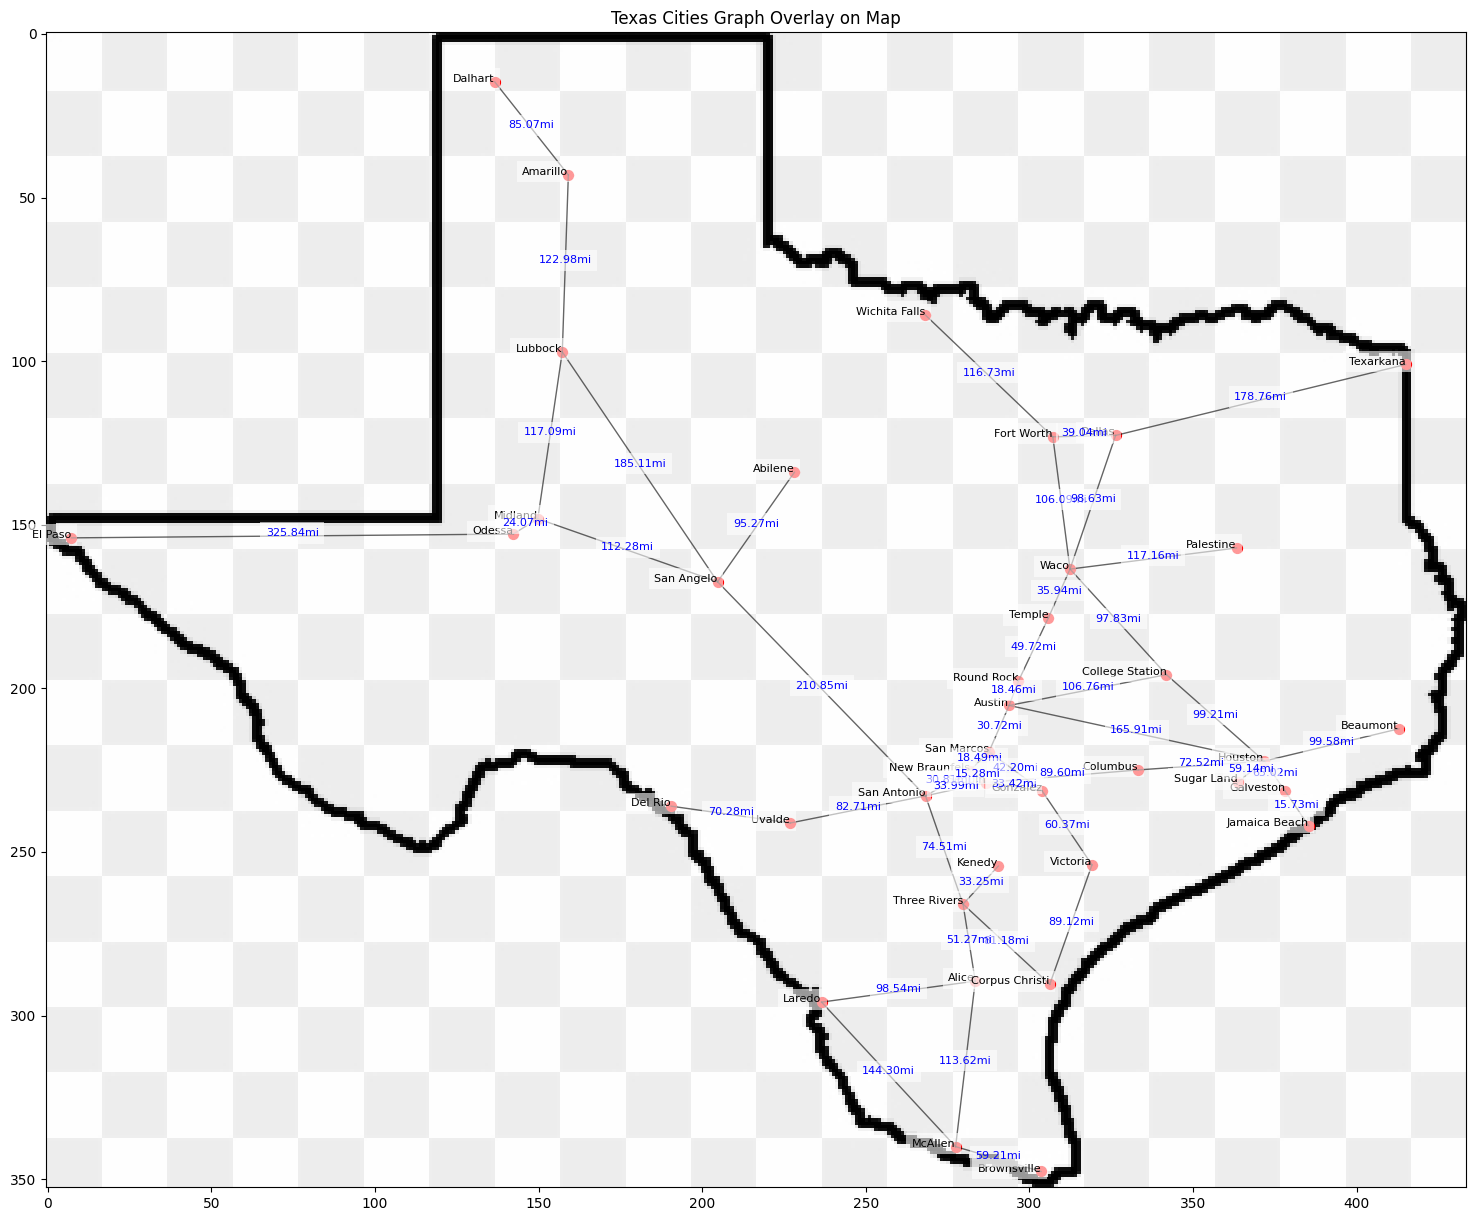

In [19]:
# Display a 2D graph of the given data.

# Load the Texas map image
img = mpimg.imread(texas_map)


# Plot the Texas map
fig, ax = plt.subplots(figsize=(20, 15))
ax.imshow(img)  # Set map bounds

# Draw nodes (cities)
for city, (x, y) in node_positions.items():
    ax.scatter(x, y, color="red", s=50)
    ax.text(x, y, city, fontsize=8, ha="right", color="black", bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# Draw distances (connections between cities)
for _, row in distances_df.iterrows():
    city1, city2, distance = row["city1"], row["city2"], row["distance"]
    x1, y1 = node_positions[city1]
    x2, y2 = node_positions[city2]
    ax.plot([x1, x2], [y1, y2], color='black', linewidth=1, alpha=0.6)  # Draw connection line
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2  # Midpoint for distance label
    ax.text(mid_x, mid_y, f"{distance:.2f}" + "mi", fontsize=8, color="blue", ha="center", bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

ax.set_title("Texas Cities Graph Overlay on Map")

plt.grid(False)
plt.show() # Show the graph

#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

Path of cities infected by the virus: ['Three Rivers', 'San Antonio', 'Corpus Christi', 'Alice', 'Kenedy', 'San Angelo', 'New Braunfels', 'Seguin', 'Uvalde', 'Victoria', 'Laredo', 'McAllen', 'Midland', 'Lubbock', 'Abilene', 'San Marcos', 'Gonzalez', 'Columbus', 'Del Rio', 'Brownsville', 'Odessa', 'Amarillo', 'Austin', 'Houston', 'El Paso', 'Dalhart', 'Round Rock', 'College Station', 'Beaumont', 'Galveston', 'Sugar Land', 'Temple', 'Waco', 'Jamaica Beach', 'Palestine', 'Fort Worth', 'Dallas', 'Wichita Falls', 'Texarkana']
Total distance traveled by the virus: 4073.6619521799994


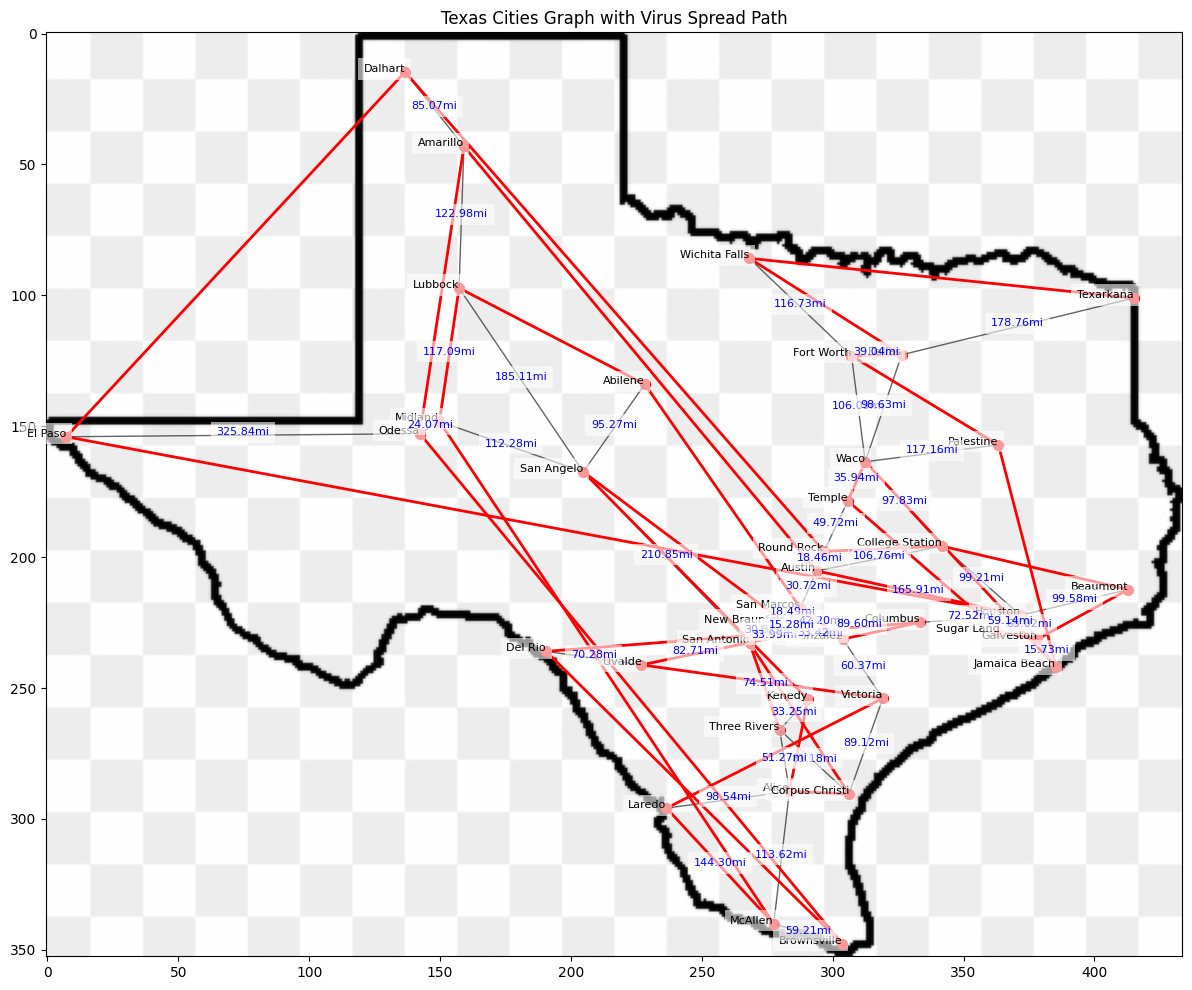

In [20]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
 #Ensure plots are displayed inline in the notebook
%matplotlib inline

# Define the BFS function
def bfs(graph, start):
    visited = set()
    queue = collections.deque([start])
    path = []
    total_distance = 0

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            path.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    queue.append(neighbor)
                    total_distance += graph[node][neighbor]['weight']

    return path, total_distance

# Create a graph
G = nx.Graph()

# Add nodes with positions
city_positions = {row["city"]: (row["longitud"], row["latitud"]) for _, row in cities_df.iterrows()}
G.add_nodes_from(city_positions.keys())

# Add edges with distances
for _, row in distances_df.iterrows():
    G.add_edge(row["city1"], row["city2"], weight=row["distance"])

# Initial State of the virus spread
start_city = "Three Rivers"

# Run the BFS algorithm
path, total_distance = bfs(G, start_city)

# Print the path and total distance
print("Path of cities infected by the virus:", path)
print("Total distance traveled by the virus:", total_distance)

# Visualize the graph with the path
# Load the Texas map image
img = mpimg.imread(texas_map)


# Plot the Texas map
fig, ax = plt.subplots(figsize=(15, 12))
ax.imshow(img)  # Set map bounds

# Draw nodes (cities)
for city, (x, y) in node_positions.items():
    ax.scatter(x, y, color="red", s=50)
    ax.text(x, y, city, fontsize=8, ha="right", color="black", bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# Draw distances (connections between cities)
for _, row in distances_df.iterrows():
    city1, city2, distance = row["city1"], row["city2"], row["distance"]
    x1, y1 = node_positions[city1]
    x2, y2 = node_positions[city2]
    ax.plot([x1, x2], [y1, y2], color='black', linewidth=1, alpha=0.6)  # Draw connection line
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2  # Midpoint for distance label
    ax.text(mid_x, mid_y, f"{distance:.2f}" + "mi", fontsize=8, color="blue", ha="center", bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# Highlight the path
path_edges = list(zip(path, path[1:]))
for city1, city2 in path_edges:
    x1, y1 = node_positions[city1]
    x2, y2 = node_positions[city2]
    ax.plot([x1, x2], [y1, y2], color='red', linewidth=2)  # Draw connection line


plt.title("Texas Cities Graph with Virus Spread Path")
plt.grid(False)
plt.show()


#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

Optimal path for vaccine transportation: ['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'College Station']
Total distance traveled: 186.77450141


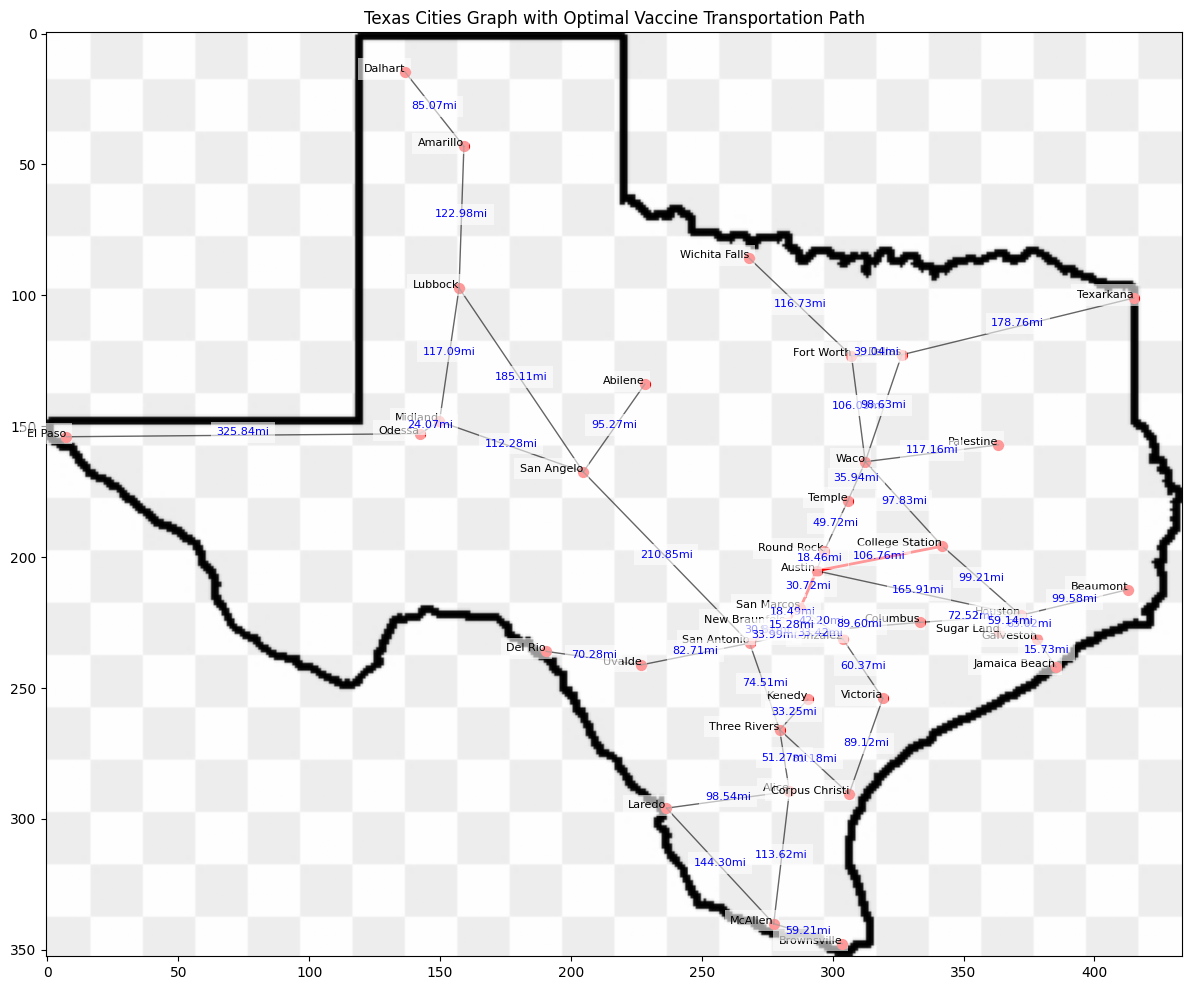

In [21]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'

#Function to calculate the Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate the distances between all paths
chance_distances = []
for _, row in distances_df.iterrows():
    city1 = row['city1']
    city2 = row['city2']
    lat1, lon1 = city_positions[city1]
    lat2, lon2 = city_positions[city2]

    distance = haversine(lat1, lon1, lat2, lon2)
    chance_distances.append([city1, city2, distance])

# Create a new DataFrame with the calculated probably distances
chance_distances_df = pd.DataFrame(chance_distances, columns=['city1', 'city2', 'distance'])

# Create a new graph with the probably distances
G_chance = nx.Graph()
for _, row in chance_distances_df.iterrows():
    G_chance.add_edge(row['city1'], row['city2'], weight=row['distance'])

# Define the heuristic function (using straight-line distance as an example)
def heuristic(node, goal, pos):
    x1, y1 = pos[node]
    x2, y2 = pos[goal]
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

#Define the A* algorithm
def astar(graph, start, goal, pos):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph.nodes}
    f_score[start] = heuristic(start, goal, pos)

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, g_score[goal]

        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + graph[current][neighbor]['weight']
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal, pos)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None, float('inf')



# Perform A* search from "San Antonio" to "College Station"
start_city = "San Antonio"
goal_city = "College Station"
path, total_distance = astar(G, start_city, goal_city, city_positions)

# Print the path and total distance
print("Optimal path for vaccine transportation:", path)
print("Total distance traveled:", total_distance)

# Visualize the graph with the path
# Load the Texas map image
img = mpimg.imread(texas_map)


# Plot the Texas map
fig, ax = plt.subplots(figsize=(15, 12))

ax.imshow(img)  # Set map bounds


# Draw nodes (cities)
for city, (x, y) in node_positions.items():
    ax.scatter(x, y, color="red", s=50)
    ax.text(x, y, city, fontsize=8, ha="right", color="black", bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# Draw distances (connections between cities)
for _, row in distances_df.iterrows():
    city1, city2, distance = row["city1"], row["city2"], row["distance"]
    x1, y1 = node_positions[city1]
    x2, y2 = node_positions[city2]
    ax.plot([x1, x2], [y1, y2], color='black', linewidth=1, alpha=0.6)  # Draw connection line
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2  # Midpoint for distance label
    ax.text(mid_x, mid_y, f"{distance:.2f}" + "mi", fontsize=8, color="blue", ha="center", bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))


# Highlight the path
path_edges = list(zip(path, path[1:]))
for city1, city2 in path_edges:
    x1, y1 = node_positions[city1]
    x2, y2 = node_positions[city2]
    ax.plot([x1, x2], [y1, y2], color='red', linewidth=2)  # Draw connection line

# Draw the edge labels
distance = {(row["city1"], row["city2"]): f'{row["distance"]:.2f}' for _, row in chance_distances_df.iterrows()}

plt.title("Texas Cities Graph with Optimal Vaccine Transportation Path")
plt.show()



#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



